In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rc

In [94]:
#출산율
data = pd.read_csv("oecd_family.csv")
plt.rcParams['font.family'] = 'NanumGothicOTF'

#합계출산율(Total fertility rate) 추출
birth_rate = data.loc[(data.IND=='FAM1',['Country', 'Year','Value'])]

#2021년 이상 데이터 삭제
birth_rate = birth_rate.drop(birth_rate.loc[birth_rate.Year>=2021].index)

#인덱스 재정렬
birth_rate.index = range(0,len(birth_rate))

#한글화를 위한 리스트 생성
CountryName = ["이스라엘","룩셈부르크","네덜란드","그리스","아이슬란드","라트비아","슬로베니아","프랑스","폴란드","튀르키예","스페인","벨기에","멕시코","아일랜드","스위스","핀란드","칠레","캐나다","대한민국","뉴질랜드","오스트레일리아","헝가리","미국","영국","오스트리아","스웨덴","덴마크","슬로바키아","체코","콜롬비아","일본","노르웨이","코스타리카","리투아니아","독일","에스토니아","포르투갈","이탈리아"]

#영어이름을 한글로
for i in range(0,38):
    for j in range(0,9):
        birth_rate.loc[i*9:i*9+j,"Country"] = CountryName[i]
        
birth_rate2 = birth_rate.pivot(index='Country', columns='Year', values='Value')

birth_rate2 = birth_rate2.reindex(index=['대한민국', '이스라엘', '일본', '튀르키예', '캐나다', '멕시코',
                                         '미국', '칠레', '콜롬비아', '코스타리카', '오스트리아', '벨기에',
                                         '체코', '덴마크', '에스토니아', '핀란드', '프랑스', '독일', '그리스',
                                         '헝가리', '아이슬란드', '아일랜드', '이탈리아', '라트비아', '리투아니아',
                                         '룩셈부르크', '네덜란드', '노르웨이', '폴란드', '포르투갈', '슬로바키아',
                                         '슬로베니아', '스페인', '스웨덴', '스위스', '영국', '오스트레일리아', '뉴질랜드'])
#birth_rate, birth_rate2

In [95]:
#성불평등지수
inequality = pd.read_csv("sex_inequality.csv")
inequality = inequality.set_index('국가별')
inequality = inequality.drop(['대륙'], axis=1)

In [96]:
#경제활동인구(여자)중 경제활동 참가율 data
df2 = pd.read_csv("경제활동인구 및 참가율(OECD).csv", encoding= "euc-kr", skiprows = 1)
plt.rcParams['font.family'] = 'NanumGothicOTF'

#column(열) 이름 바꾸기 = 연도
df2= df2.rename(columns = {'여자 (%)' : '2012'})
for i in range(1,10):
    df2 = df2.rename(columns = {'여자 (%).{}'.format(i): str(2012+i)} )

namelist = []
#row(행) 이름 바꾸기. = 국가    
for i in range(len(df2)):
    x = df2.loc[i,'국가별'].find("(")
    name = df2.loc[i,'국가별']
    if(x != -1):
        name = name[:x]
        namelist.append(name)
        df2.rename(index = {i :name},inplace = True)
    else:
        df2.rename(index = {i :name},inplace = True)

#필요한 데이터만 추출.
col_name = []
for i in range(2012,2021):
    col_name.append(str(i))

rate_df = df2[col_name]

#NaN 값 제거.
rate_df.drop(rate_df.index[0], inplace= True)
rate_df.dropna(inplace=True)
rate_df.head()

#빈값 찾기.
col = rate_df.columns.values

index = rate_df.index.values
outlier = {}
for i in index:
    for c in col:
        if (rate_df.loc[i,str(c)] == '-'):
            outlier[c] = i

#국가별 평균값으로 빈값 찾기.
sum = 0
for key in outlier.keys():
    sum = 0
    for c in col:
        if (c == key):
            continue
        else:
            sum += float(rate_df.loc[outlier.get(key),str(c)])
    rate_df.loc[outlier.get(key), key] = round(sum/(len(col)-len(outlier)),1)

country = []
year = []
value = []
rate_val = []

#새로운 데이터 만들기 위한 값 배치.
for i in range(len(namelist)):
    for j in range(2012,2021):
        country.append(namelist[i])
        year.append(j)

for i in range(len(country)):
    rate_val.append(float(rate_df[str(year[i])][country[i]]))
    
#전처리 완료한 데이터.
rate_df = pd.DataFrame({
    'Country' : country,
    'Year' : year,
    'rate_val' : rate_val
})

C:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_s

In [97]:
totaldf = pd.merge(birth_rate, rate_df, on = ['Country','Year'])

In [98]:
#GDP
# GDP 데이터
df = pd.read_csv("OECD 국가의 주요지표.csv", encoding= "euc-kr", skiprows = 1)

#column(열) 이름 바꾸기 = 연도
df= df.rename(columns = {'국내총생산(GDP)(당해년 가격) (10억US$)' : '2012'})

for i in range(1,10):
    df = df.rename(columns = {'국내총생산(GDP)(당해년 가격) (10억US$).{}'.format(i): str(2012+i)} )

#row(행) 이름 바꾸기. = 국가
for i in range(len(df)):
    df.rename(index = {i :df.loc[i,'국가별']},inplace = True)

# df.head()

#필요한 GDP 데이터만 데이터프레임으로 추출.
#column 이름으로 추출.
col_name = []
for i in range(2012,2021):
    col_name.append(str(i))

GDP_df = df[col_name]

#NaN 값 제거.
GDP_df.drop(GDP_df.index[0], inplace= True)
GDP_df.dropna(inplace=True)

#OECD 총값 제거.
GDP_df.drop(GDP_df.tail(1).index,inplace=True)

#빈값, 잘못된 값 찾기
col = GDP_df.columns.values

index = GDP_df.index.values
outlier = {}
for i in index:
    for c in col:
        if (GDP_df.loc[i,str(c)] == '-'):
            outlier[c] = i
#빈값, 잘못된 값을 각 국의 평균값으로 대체.
sum = 0
for key in outlier.keys():
    sum = 0
    for c in col:
        if (c == key):
            continue
        else:
            sum += float(GDP_df.loc[outlier.get(key),str(c)])
    GDP_df.loc[outlier.get(key), key] = round(sum/(len(col)-len(outlier)),1)
    
#데이터 새로 생성
new = pd.DataFrame({"Country":[],"Year":[],"GDP":[]})
for country in range (0,len(GDP_df)):
    for year in range (0,9):
        new.loc[len(new)] = [GDP_df.index[country],GDP_df.columns[year],float(GDP_df.iloc[country,year])]
new["Year"] = pd.to_datetime(new["Year"]).dt.year

#출산율, gdp 데이터 merge
data = pd.merge(new, birth_rate)
data.rename(columns={"Value" : "Birth"}, inplace=True)

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\anaconda\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [99]:
#경제활동참가율 - 출생율
year = []
corr = []
pval = []

#연도별 상관분석
for i in range(2012,2021):
    d = totaldf[totaldf['Year']== i]
    x = d['Value']
    y = d['rate_val']

    #H0: 상관관계가 없다. / H1: 상관관계가 있다.
    #상관계수, p-value
    s,p = stats.pearsonr(x,y)
    year.append(i)
    corr.append(s)
    pval.append(p)
pd.DataFrame({'year': year, 'corr': corr, 'p': pval})

,year,corr,p
0,2012,0.212346,0.200575
1,2013,0.187381,0.259944
2,2014,0.157203,0.345900
3,2015,0.130691,0.434165
4,2016,0.111525,0.505023
5,2017,0.071689,0.668864
6,2018,0.090414,0.589308
7,2019,0.115119,0.491308
8,2020,0.052825,0.752777


Text(0.5, 1.0, '연도별 출생율-경제참여율 상관계수')

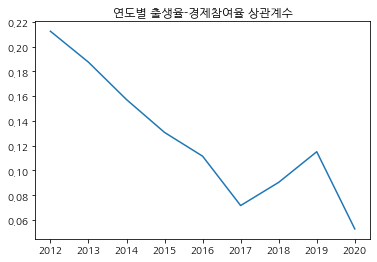

In [100]:
#연도별 상관계수 변화
corr_result = pd.DataFrame({'year' : year, 'corr' : corr})
plt.plot(corr_result['year'], corr_result['corr'])
plt.title("연도별 출생율-경제참여율 상관계수")

In [101]:
#국가별 출생율-경제참여율 상관분석
name = []
corr = []
pval = []
for i in namelist:
    d = totaldf[totaldf['Country']== i]
    x = d['Value']
    y = d['rate_val']

    s,p = stats.pearsonr(x,y)
    name.append(i)
    corr.append(s)
    pval.append(p)
    
pd.DataFrame({'country': name, 'corr': corr, 'p': pval})

,country,corr,p
0,대한민국,-0.812277,0.007813
1,이스라엘,0.563700,0.113943
2,일본,-0.682362,0.042854
3,튀르키예,-0.339033,0.372110
4,캐나다,0.531385,0.140952
5,멕시코,0.323134,0.396339
6,미국,0.489086,0.181499
7,칠레,0.130405,0.738078
8,콜롬비아,0.641500,0.062567
9,코스타리카,0.309079,0.418345


<AxesSubplot:xlabel='Country', ylabel='rate_val'>

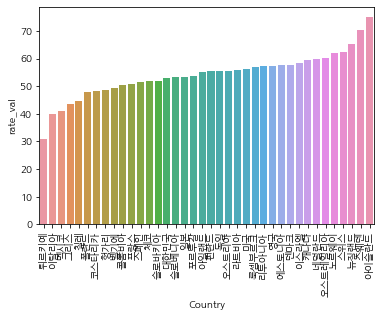

In [102]:
z = rate_df[rate_df['Year'] == 2020]
z = z.sort_values('rate_val')
plt.xticks(rotation=90)
sns.barplot(x = 'Country', y = 'rate_val',data = z)

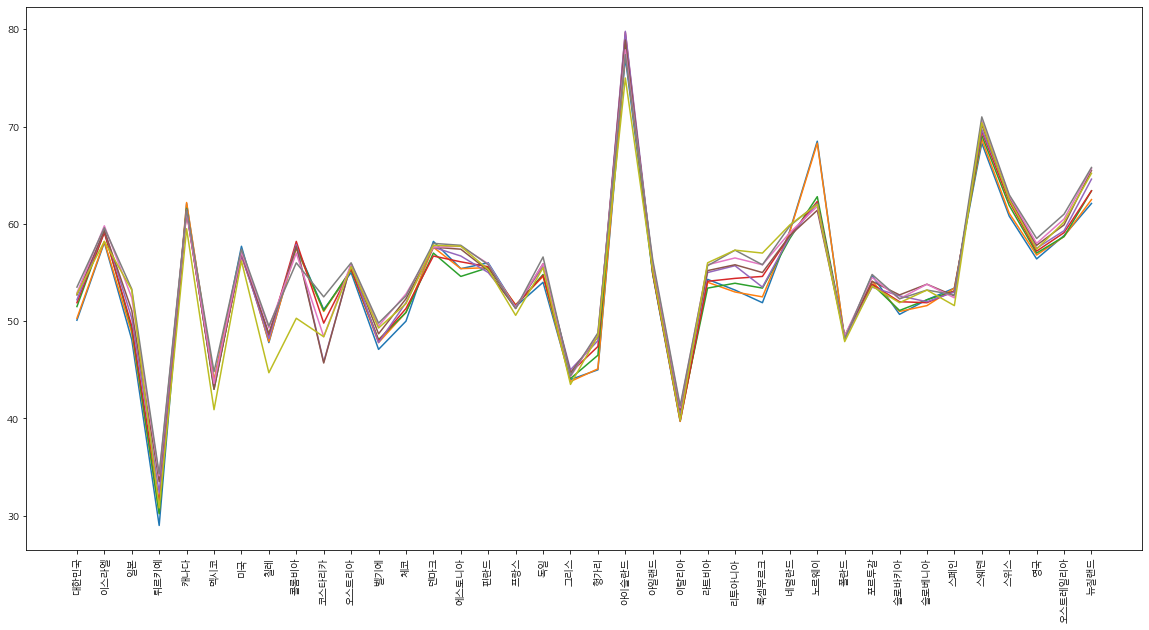

In [103]:
plt.figure(figsize=(20,10))
for i in range(2012, 2021):
    plt.plot(rate_df[rate_df['Year'] == i]['Country'], rate_df[rate_df['Year'] == i]['rate_val'])

plt.xticks(rotation = 90)
plt.show()

In [104]:
#성불평등지수 - 출생율
list = pd.DataFrame({'year': [], 'corr': [], 'p': []})

#연도별 상관분석
for i in range(0,9):
    x, y = stats.pearsonr(inequality.iloc[:,i],birth_rate2.iloc[:,i])
    list.loc[i] = [2012+i,x,y]
list

,year,corr,p
0,2012.0,0.250632,0.129082
1,2013.0,0.262986,0.110663
2,2014.0,0.268355,0.103307
3,2015.0,0.271438,0.099255
4,2016.0,0.261878,0.112228
5,2017.0,0.269938,0.101211
6,2018.0,0.265764,0.106809
7,2019.0,0.295331,0.071841
8,2020.0,0.275723,0.093826


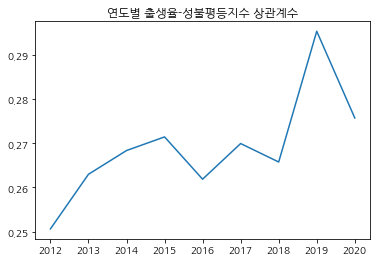

In [105]:
#년도별 상관계수 변화
plt.plot(list["year"],list["corr"])
plt.title("연도별 출생율-성불평등지수 상관계수")
plt.show()

In [106]:
#국가별 상관분석 출생율 - 성불평등지수
list2 = pd.DataFrame({'country': [], 'corr': [], 'p': []})

for i in range(0,38):
    x, y = stats.pearsonr(inequality.iloc[i,],birth_rate2.iloc[i,])
    list2.loc[i] = [inequality.index[i],x,y]
list2

,country,corr,p
0,대한민국,0.905432,7.798785e-04
1,이스라엘,0.240207,5.335762e-01
2,일본,0.602200,8.616210e-02
3,튀르키예,0.830061,5.617516e-03
4,캐나다,0.974669,8.309829e-06
5,멕시코,0.985526,1.184291e-06
6,미국,0.973134,1.019357e-05
7,칠레,0.983210,1.986686e-06
8,콜롬비아,0.869930,2.295741e-03
9,코스타리카,0.898957,9.769250e-04


Text(0.5, 1.0, '년도별 출생율')

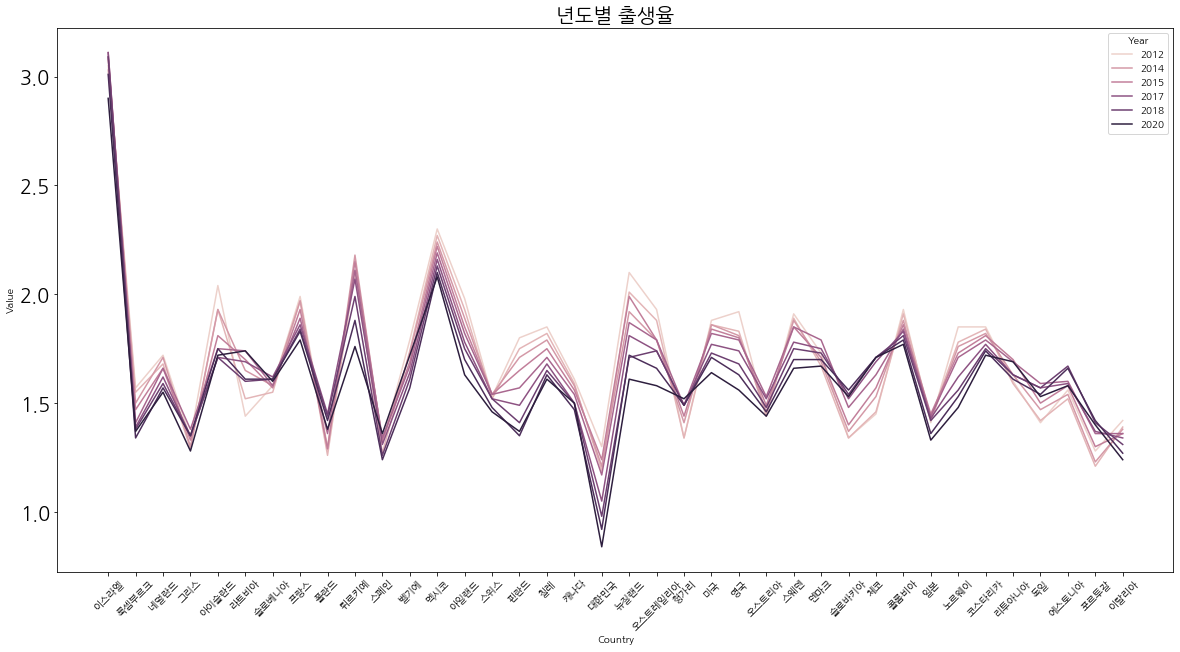

In [107]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=20)
sns.lineplot(data=birth_rate,x='Country', y='Value', hue="Year")
plt.title("년도별 출생율", fontsize=20)

Text(0.5, 1.0, '년도별 GDP')

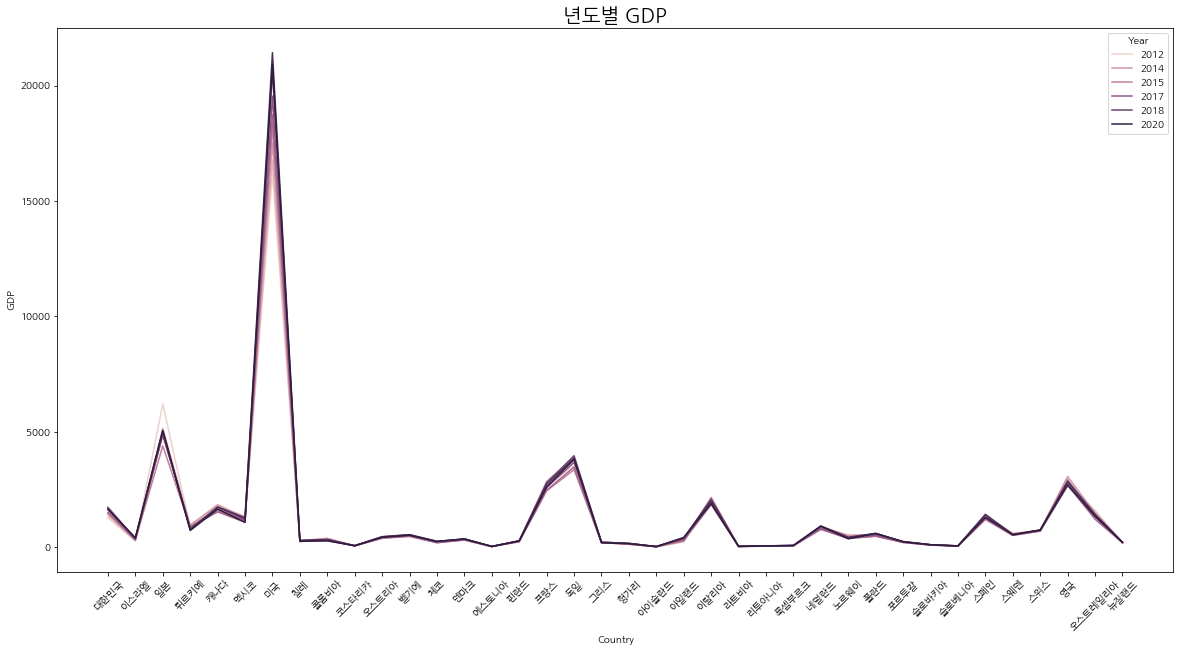

In [108]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.lineplot(data=data,x='Country', y='GDP', hue="Year")
plt.title("년도별 GDP", fontsize=20)

In [109]:
#국가 별 상관계수 출생율 - GDP
country = pd.DataFrame({"Country":[],"상관계수":[],"p-value":[]})

for i in range(0,38):
    r, p = stats.pearsonr(data.loc[(data.Country==data.iloc[i*9,0]),"Birth"], data.loc[(data.Country==data.iloc[i*9,0]),"GDP"])
    country.loc[i] = [data.iloc[i*9,0],r,p]
country

,Country,상관계수,p-value
0,대한민국,-0.860863,0.002880
1,이스라엘,-0.461560,0.211059
2,일본,-0.233176,0.545977
3,튀르키예,0.897980,0.001009
4,캐나다,0.402302,0.283081
5,멕시코,0.355489,0.347798
6,미국,-0.932023,0.000252
7,칠레,-0.163497,0.674258
8,콜롬비아,0.729862,0.025596
9,코스타리카,-0.938189,0.000182


In [110]:
#GDP-출생율 나라별 싱관계수
year = pd.DataFrame({"Year":[],"상관계수":[],"p-value":[]})

for i in range(0,9):
    r, p = stats.pearsonr(data.loc[(data.Year==2012+i),"Birth"], data.loc[(data.Year==2012+i),"GDP"])
    year.loc[i] = [2012+i,r,p]
year["Year"] = year["Year"].astype(int)
year

,Year,상관계수,p-value
0,2012,0.022321,0.894182
1,2013,0.044375,0.791365
2,2014,0.040979,0.807017
3,2015,0.041445,0.804866
4,2016,0.027967,0.867626
5,2017,0.012691,0.939720
6,2018,0.000864,0.995890
7,2019,-0.001962,0.990674
8,2020,-0.036309,0.828660


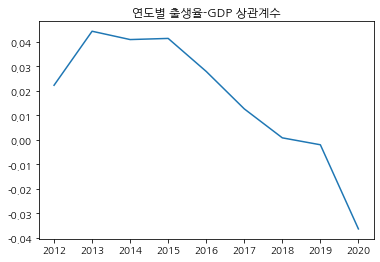

In [111]:
#년도별 상관계수 변화
plt.rcParams['axes.unicode_minus'] = False
plt.plot(year["Year"],year["상관계수"])
plt.title("연도별 출생율-GDP 상관계수")
plt.show()

In [112]:
for i in range(0,38):
    if birth_rate2.iloc[i,0]<birth_rate2.iloc[i,8]:
        print(birth_rate2.index[i])

체코
에스토니아
독일
헝가리
라트비아
리투아니아
폴란드
포르투갈
슬로바키아
슬로베니아
스페인
